In [1]:
cd ../..

/home/users/cdonoso/astromer/ASTROMER


In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import numpy as np
import os

from core.utils import get_metrics

%load_ext autoreload
%autoreload 2

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
losses = []
dirs = []
for directory in os.listdir('runs'):
    if 'huge' in directory:
        train_metrics = get_metrics(os.path.join('runs', directory, 'logs', 'train'))
        try:
            val_metrics = get_metrics(os.path.join('runs', directory, 'logs', 'validation'))
            loss_val = np.array(val_metrics['epoch_loss'])
        except:
            try:
                val_metrics = get_metrics(os.path.join('runs', directory, 'logs', 'valid'))
                loss_val = np.array(val_metrics['mse'])
            except:
                continue
        
        losses.append(loss_val)
        dirs.append(directory)

huge_scheduler_cache_2
huge_10.0
huge_scheduler_cache
huge_scheduler_0
huge_0.1
huge_1e-05
huge_scheduler
huge_1.0
huge_100.0
huge_0.001
huge_0.0001
huge_scheduler_cache_0
huge_lr_increase
huge_scheduler_1
huge_0.01
huge_lr_decay
huge_scheduler_cache_1


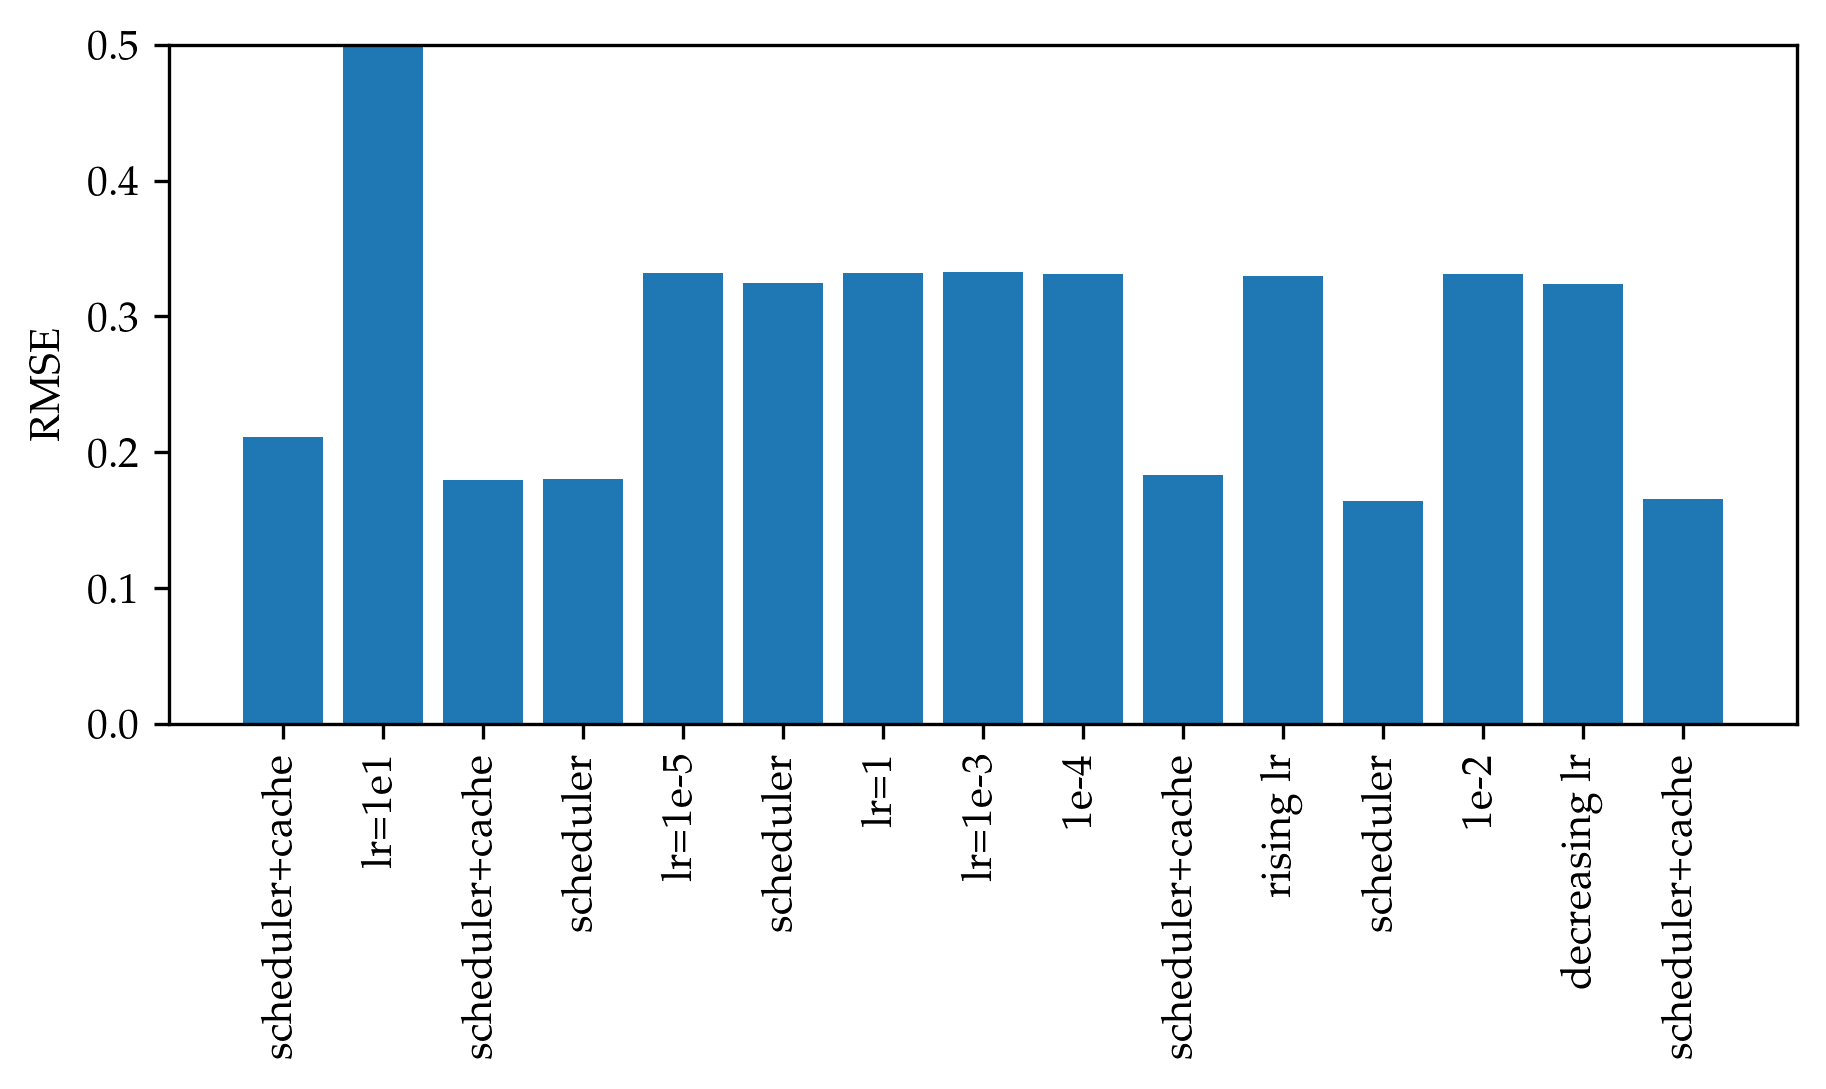

In [75]:
min_loss = [min(x) for x in losses]

plt.figure(figsize=(7,3), dpi=300)
plt.bar(range(len(min_loss)), min_loss)
plt.xticks(range(len(min_loss)), 
['scheduler+cache', 'lr=1e1', 'scheduler+cache', 'scheduler', 'lr=1e-5', 'scheduler', 'lr=1', 'lr=1e-3', '1e-4',
'scheduler+cache', 'rising lr', 'scheduler', '1e-2', 'decreasing lr', 'scheduler+cache'], rotation=90)
plt.ylim(0, 0.5)
plt.ylabel('RMSE')
plt.show()